In [16]:
import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor
import librosa

# 🎯 장치 설정
device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

# 🎧 오디오 로딩 (librosa 사용)
path_to_audio = "./ML_part/recoding/학교폭력_SAMPLE.mp3"
waveform_np, sample_rate = librosa.load(path_to_audio, sr=16000)
waveform = torch.tensor(waveform_np).unsqueeze(0)

# 🤖 모델/프로세서 로딩
model_id = "./ML_part/model/whisper-small"
model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True
)
model.to(device)
processor = AutoProcessor.from_pretrained(model_id)

# 📦 입력 전처리
inputs = processor(
    waveform.squeeze().numpy(),
    sampling_rate=sample_rate,
    return_tensors="pt",
    language="en"  # 필요 시 'ko' 등 변경 가능
).to(device)
inputs["input_features"] = inputs["input_features"].to(dtype=torch_dtype)

# 🔮 추론
with torch.no_grad():
    generated_tokens = model.generate(inputs["input_features"])

# 🧠 special tokens 포함하여 디코딩
decoded_text = processor.batch_decode(generated_tokens, skip_special_tokens=False)[0]
print("\n🗣️ 전체 디코딩 결과:", decoded_text)

# 🪄 [SEP] 기준 문장 분리 (또는 <|endoftext|> 등도 가능)
sentences = [s.strip() for s in decoded_text.split("[SEP]") if s.strip()]

# 📋 출력
print("\n📌 문장 리스트:")
for idx, sentence in enumerate(sentences, 1):
    print(f"{idx}. {sentence}")



🗣️ 전체 디코딩 결과:  너는 맞으면 아프고 나는 맞으면 안 아파? 아프겠지 아프니까 나는 어렸으니까 너무 그때 너 어렸으니까 내가 철 없다고 했잖아 그러니까 내가 사과를 하는 거잖아 그니까 그 사과가 왜 말로 틈 치고 마냐고 그때 나도 어렸으니까 내가 나이 먹고 내가 그렇게 했니? 나도 그때는 철이 없었으니까 그때 한 거잖아

📌 문장 리스트:
1. 너는 맞으면 아프고 나는 맞으면 안 아파? 아프겠지 아프니까 나는 어렸으니까 너무 그때 너 어렸으니까 내가 철 없다고 했잖아 그러니까 내가 사과를 하는 거잖아 그니까 그 사과가 왜 말로 틈 치고 마냐고 그때 나도 어렸으니까 내가 나이 먹고 내가 그렇게 했니? 나도 그때는 철이 없었으니까 그때 한 거잖아


In [2]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import TextClassificationPipeline
import matplotlib.pyplot as plt
import whisper
import tqdm
%matplotlib inline

In [3]:
model = whisper.load_model("small")

In [ ]:
result = model.transcribe(".\학교폭력_SAMPLE.mp3")
#result = model.transcribe("./ML_part/recoding/1_B398G1A1_B402G1A1_T1_1D09T0356C000444_050516.wav")
textlist = []
for i in result:
    if i == 'segments':
        for j in result[i]:
            if j['text'] not in textlist:
                textlist.append(j['text'])
print(textlist)

[' 너는 맞으면 아프고 나는 맞으면 안 아파?', ' 아프겠지 아프니까', ' 나는 어렸으니까 너무나', ' 그때도 어렸으니까 내가 철 없다고 했잖아', ' 그러니까 내가 사과를 하는 거잖아', ' 그니까 그 사과가 왜 말로 틈 치고 마냐고', ' 그때도 나도 어렸으니까', ' 내가 나이 먹고 내가 그렇게 했니?', ' 나도 그때로 철이 없었으니까', ' 그때로 한 거잖아', ' 친구 때리면 안 된다는 거는', ' 초등학교 1학년 때부터 배우는 거야', ' 발음새만 어쩌고 그런 거에서', ' 친구 놀리지 말라는 건 유치원에서 배우는 거고', ' 나도 한번 물어보자', ' 너는 나를 그렇게 왜 때렸냐?', ' 나도 그때 철이 없었으니까', ' 나도 모르겠다', ' 철이 없었다 이런 얘기 말고', ' 나도 모르지', ' 내가 왜 그때 내가 왜 그렇게 때렸는지', ' 나도 몰라']
                    Message
0   너는 맞으면 아프고 나는 맞으면 안 아파?
1                 아프겠지 아프니까
2              나는 어렸으니까 너무나
3    그때도 어렸으니까 내가 철 없다고 했잖아
4        그러니까 내가 사과를 하는 거잖아


## Bert Models

### school_violence_kcbert_base

In [5]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification

In [6]:
model_path = "C:/Users/smhrd/test/ML/model_output/school_violence_kcbert_base"
# tokenizer와 model 불러오기
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

### school_violence_kcbert_Large

In [56]:
model_path = "C:/Users/smhrd/test/ML/model_output/school_violence_kcbert_large"
# tokenizer와 model 불러오기
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

### beomi/KcELECTRA-small-v2022

In [49]:
tokenizer = AutoTokenizer.from_pretrained("beomi/KcELECTRA-small-v2022")
model = AutoModelForSequenceClassification.from_pretrained("beomi/KcELECTRA-small-v2022")

c:\Users\smhrd\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\smhrd\.cache\huggingface\hub\models--beomi--KcELECTRA-small-v2022. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of ElectraForSequenceClassification were not initialized from the model ch

### KcELECTRA-base-v2022

In [16]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification


tokenizer = AutoTokenizer.from_pretrained("beomi/KcELECTRA-base-v2022")
model = AutoModelForSequenceClassification.from_pretrained("beomi/KcELECTRA-base-v2022")

# 구버전(v2021)을 사용하기 원하실 경우
#tokenizer = AutoTokenizer.from_pretrained("beomi/KcELECTRA-base")
#model = AutoModel.from_pretrained("beomi/KcELECTRA-base")

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base-v2022 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### KcBert-base

In [7]:
# BERT 모델과 토크나이저 불러오기
model_name = "beomi/kcbert-base"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/kcbert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### KcBert-Large

In [98]:
# BERT 모델과 토크나이저 불러오기
model_name = "beomi/kcbert-large"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/kcbert-large and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### KoBert

In [ ]:
# BERT 모델과 토크나이저 불러오기
from transformers import BertModel, XLNetTokenizer
from kobert_tokenizer import KoBERTTokenizer
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
model = BertModel.from_pretrained('skt/kobert-base-v1')

## 감성분석

In [70]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import os

sentiment_model_name = "C:/Users/smhrd/test/ML/ML_part/model/nsmc_unsmile_kcbert_large"  # 상대경로
sentiment_tokenizer = AutoTokenizer.from_pretrained("beomi/KcBert-large")
sentiment_model = AutoModelForSequenceClassification.from_pretrained(sentiment_model_name)
print(sentiment_model.config.id2label)

{0: 'negative', 1: 'positive'}


In [73]:
# 파이프라인 생성
sentiment_pipeline = TextClassificationPipeline(model=sentiment_model, tokenizer=tokenizer, return_all_scores=True)

Device set to use cuda:0


In [75]:
from transformers import pipeline

sentiment_pipe = pipeline("text-classification", model=sentiment_model, tokenizer=sentiment_tokenizer, return_all_scores=True)
print(sentiment_pipe("이 영화 진짜 재밌어요!")[0])
print(sentiment_pipe("아 진짜 개별로네")[0])
print(sentiment_pipe("뒤지고 싶음?")[0])
print(sentiment_pipe("너무너무 사랑해")[0])


Device set to use cuda:0


[{'label': 'negative', 'score': 0.013564319349825382}, {'label': 'positive', 'score': 0.9864357113838196}]
[{'label': 'negative', 'score': 0.9928217530250549}, {'label': 'positive', 'score': 0.007178212981671095}]
[{'label': 'negative', 'score': 0.993728756904602}, {'label': 'positive', 'score': 0.006271227728575468}]
[{'label': 'negative', 'score': 0.017791416496038437}, {'label': 'positive', 'score': 0.9822085499763489}]


In [81]:
# 감정 분석 수행
def sentiment_analysis(message):
    results = sentiment_pipeline(message)
    positive_score = results[0][1]['score']
    negative_score = results[0][0]['score']
    return positive_score, negative_score

sentiment_df = pd.DataFrame(textlist, columns = ['Message']) 
# 대화 내용에 대해 감정 분석 수행
sentiment_df['Positive'], sentiment_df['Negative'] = zip(*sentiment_df['Message'].map(sentiment_analysis))

In [114]:
sentiment_df[8:14]

,Message,Positive,Negative
8,나도 그때로 철이 없었으니까,0.146546,0.853454
9,그때로 한 거잖아,0.859396,0.140604
10,친구 때리면 안 된다는 거는,0.085334,0.914666
11,초등학교 1학년 때부터 배우는 거야,0.958562,0.041438
12,발음새만 어쩌고 그런 거에서,0.117815,0.882185
13,친구 놀리지 말라는 건 유치원에서 배우는 거고,0.171718,0.828282


In [88]:
negative_count = len(sentiment_df[sentiment_df['Negative'] > 0.7])
positive_count = len(sentiment_df[sentiment_df['Positive'] > 0.5])
positive_ratio = positive_count / len(sentiment_df)
negative_ratio = negative_count / len(sentiment_df)

In [89]:
print(f"부정 감정 개수: {negative_count}")
print(f"긍정 감정 개수: {positive_count}")
print(f"전체 문장 개수: {len(sentiment_df)}")
print(f"긍정 감정 비율: {positive_ratio:.2f}")
print(f"부정 감정 비율: {negative_ratio:.2f}")
print(f"긍정 감정 평균: {df['Positive'].mean():.2f}")
print(f"부정 감정 평균: {df['Negative'].mean():.2f}")

부정 감정 개수: 13
긍정 감정 개수: 9
전체 문장 개수: 22
긍정 감정 비율: 0.41
부정 감정 비율: 0.59
긍정 감정 평균: 0.05
부정 감정 평균: 0.95


Text(0.5, 1.0, 'Sentiment ratio')

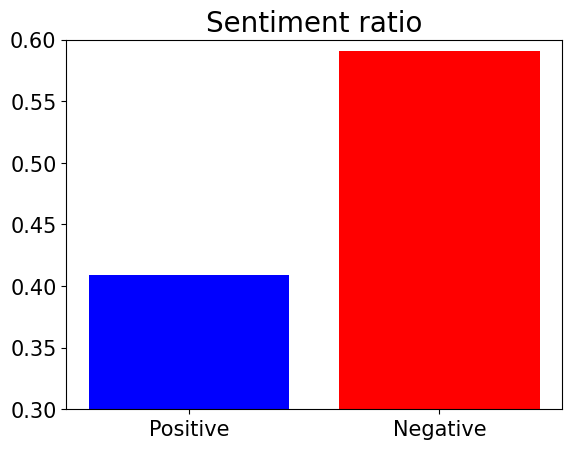

In [ ]:
plt.bar(['Positive', 'Negative'], [positive_ratio, negative_ratio], color=['blue', 'red'])
plt.ylim([0.3, 0.6])
#폰트 크기 설정
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Sentiment ratio', fontsize=20)

In [26]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline
import numpy as np

In [93]:
# 모델 경로 (trainer.save_model("./saved_model")에서 저장한 경로)
school_violence_model = "./model_output/school_violence_kcbert_base"

# tokenizer와 model 불러오기
school_violence_tokenizer = AutoTokenizer.from_pretrained(school_violence_model)
school_violence_model = AutoModelForSequenceClassification.from_pretrained(school_violence_model)

In [94]:
school_violence_pipe = TextClassificationPipeline(
    model = school_violence_model,
    tokenizer = school_violence_tokenizer,
    device=0,
    return_all_scores=True,
    function_to_apply='sigmoid'
    )

Device set to use cuda:0
c:\Users\smhrd\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [95]:
school_df = pd.DataFrame(textlist, columns = ['Message'])
school_df

,Message
0,너는 맞으면 아프고 나는 맞으면 안 아파?
1,아프겠지 아프니까
2,나는 어렸으니까 너무나
3,그때도 어렸으니까 내가 철 없다고 했잖아
4,그러니까 내가 사과를 하는 거잖아
5,그니까 그 사과가 왜 말로 틈 치고 마냐고
6,그때도 나도 어렸으니까
7,내가 나이 먹고 내가 그렇게 했니?
8,나도 그때로 철이 없었으니까
9,그때로 한 거잖아


In [112]:
for text in textlist:
    result = school_violence_pipe(text)  # 결과 예시: [[{label: '혐오', score: 0.01}, ...]]
    
    # 1. 2차원 리스트 구조 해제 (첫 번째 요소 추출)
    labels_scores = result[0]  # [{label: '혐오', score: ...}, ...]
    
    # 2. 라벨을 키로 하는 딕셔너리 생성
    score_dict = {item['label']: item['score'] for item in labels_scores}
    
    # 3. DataFrame 업데이트
    school_df.loc[school_df['Message'] == text, '혐오'] = score_dict.get('혐오', 0)
    school_df.loc[school_df['Message'] == text, '악플/욕설'] = score_dict.get('악플/욕설', 0)
    school_df.loc[school_df['Message'] == text, 'clean'] = score_dict.get('clean', 0)
    school_df.loc[school_df['Message'] == text, '학교폭력'] = score_dict.get('학교폭력', 0)

school_df[14:]


,Message,혐오,악플/욕설,clean,학교폭력
14,나도 한번 물어보자,0.007153,0.014833,0.968023,0.025388
15,너는 나를 그렇게 왜 때렸냐?,0.032694,0.026931,0.016028,0.984488
16,나도 그때 철이 없었으니까,0.029854,0.016511,0.027801,0.982366
17,나도 모르겠다,0.005695,0.009177,0.526853,0.494484
18,철이 없었다 이런 얘기 말고,0.026139,0.020139,0.022602,0.981730
19,나도 모르지,0.004744,0.010687,0.674207,0.365428
20,내가 왜 그때 내가 왜 그렇게 때렸는지,0.048100,0.030670,0.013580,0.988992
21,나도 몰라,0.004632,0.013201,0.908702,0.070898


In [108]:
disgust_count = len(school_df[school_df['혐오'] > 0.5])
hate_count = len(school_df[school_df['악플/욕설'] > 0.5])
clean_count = len(school_df[school_df['clean'] > 0.5])
school_violence_count = len(school_df[school_df['학교폭력'] > 0.5])
disgust_ratio = disgust_count / len(school_df)
hate_ratio = hate_count / len(school_df)
clean_ratio = clean_count / len(school_df)
school_violence_ratio = school_violence_count / len(school_df)

disgust_mean = school_df['혐오'].mean()
hate_mean = school_df['악플/욕설'].mean()
clean_mean = school_df['clean'].mean()
school_violence_mean = school_df['학교폭력'].mean()

print(f"혐오 감정 개수: {disgust_count}")
print(f"악플/욕설 감정 개수: {hate_count}")
print(f"clean 감정 개수: {clean_count}")
print(f"학교폭력 감정 개수: {school_violence_count}")
print(f"전체 문장 개수: {len(school_df)}")
print()
print(f"혐오 감정 비율: {disgust_ratio:.2f}")
print(f"악플/욕설 감정 비율: {hate_ratio:.2f}")
print(f"clean 감정 비율: {clean_ratio:.2f}")
print(f"학교폭력 감정 비율: {school_violence_ratio:.2f}")
print()
print(f"혐오 감정 평균: {disgust_mean:.2f}")
print(f"악플/욕설 감정 평균: {hate_mean:.2f}")
print(f"clean 감정 평균: {clean_mean:.2f}")
print(f"학교폭력 감정 평균: {school_violence_mean:.2f}")

혐오 감정 개수: 0
악플/욕설 감정 개수: 0
clean 감정 개수: 5
학교폭력 감정 개수: 17
전체 문장 개수: 22

혐오 감정 비율: 0.00
악플/욕설 감정 비율: 0.00
clean 감정 비율: 0.23
학교폭력 감정 비율: 0.77

혐오 감정 평균: 0.02
악플/욕설 감정 평균: 0.02
clean 감정 평균: 0.24
학교폭력 감정 평균: 0.77


Text(0.5, 1.0, 'School Violence ratio')

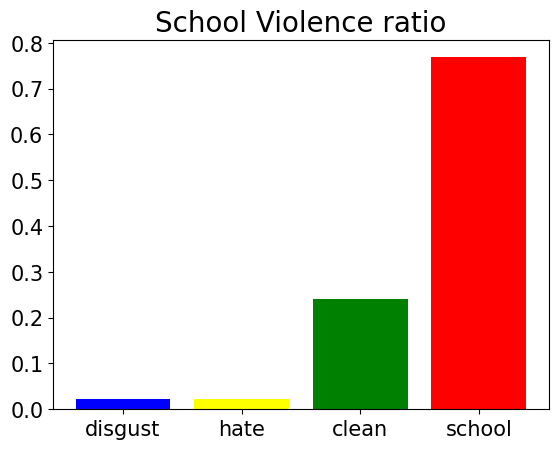

In [109]:
plt.bar(['disgust', 'hate', 'clean', 'school'], [disgust_mean, hate_mean, clean_mean, school_violence_mean], color=['blue', 'yellow', 'green', 'red'])
#plt.ylim([0.3, 0.6])
#폰트 크기 설정
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('School Violence ratio', fontsize=20)

Text(0.5, 1.0, 'School Violence ratio')

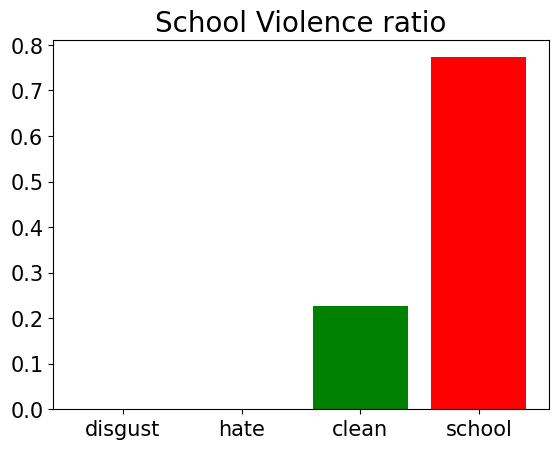

In [105]:
plt.bar(['disgust', 'hate', 'clean', 'school'], [disgust_ratio, hate_ratio, clean_ratio, school_violence_ratio], color=['blue', 'yellow', 'green', 'red'])
#plt.ylim([0.3, 0.6])
#폰트 크기 설정
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('School Violence ratio', fontsize=20)